In [10]:
import experiment_framework as ef
import fast_model_improved as fmi
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [11]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle


In [12]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1995
Number of deinfluenced nodes: 0
Number of susceptible nodes: 2044
influencer {1153, 1923, 3460, 2948, 3589, 3591, 136, 135, 2183, 1291, 2966, 2070, 281, 2075, 1182, 2463, 929, 2348, 1325, 2350, 1329, 3387, 3133, 2493, 2878, 1853, 577, 1736, 584, 2762, 1106, 3833, 2518, 3542, 1240, 3158, 1370, 94, 224, 1890, 3299, 2916, 3945, 621, 3055, 3186, 1527, 377, 3709, 2943}


In [13]:
# Run simulation for different values of k
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # Different values of k to test
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=2)

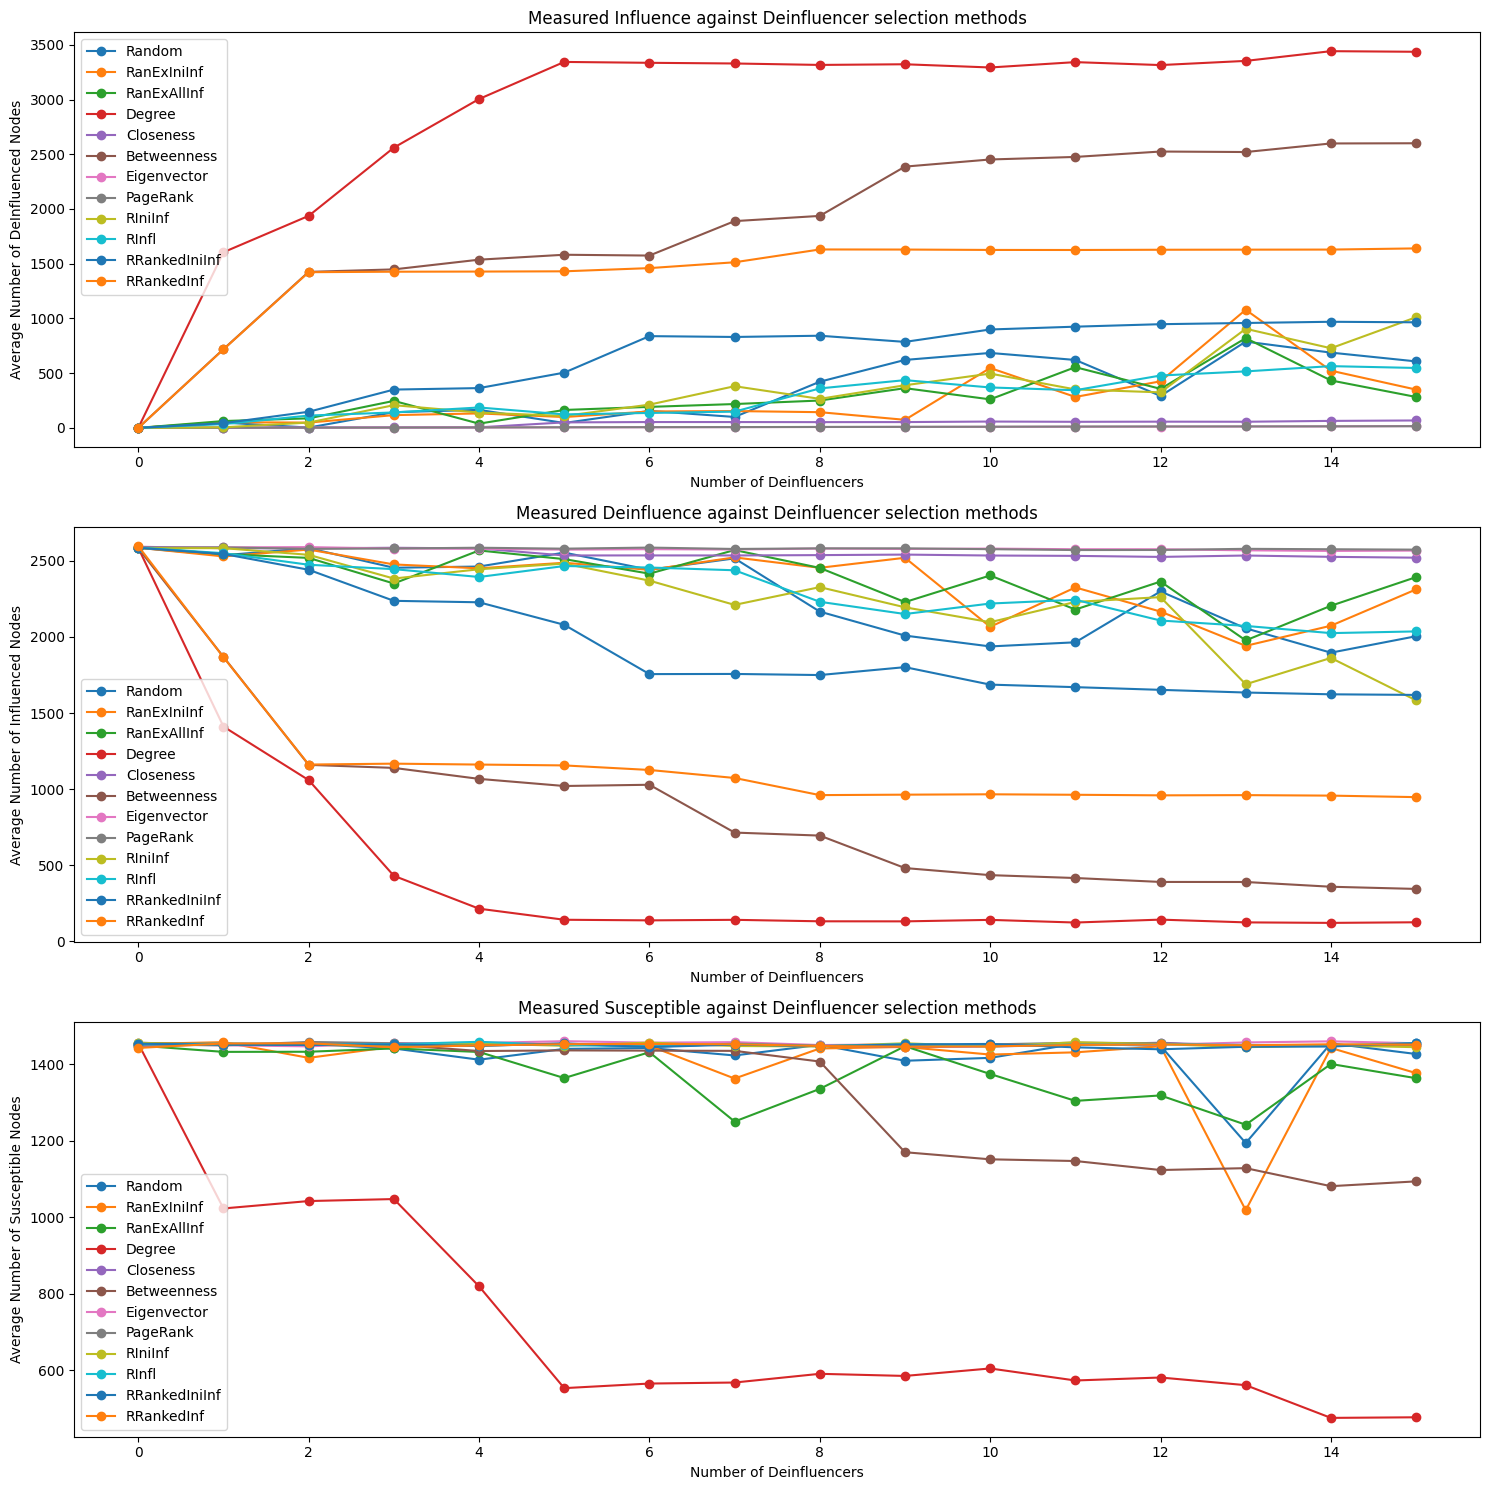

In [18]:
# Define different marker styles for each method
marker_styles = {
    'Random': 'o',
    'RdExIniInf': 's',
    'RanExAllInf': 'D',
    'Degree': 'v',
    'Closeness': '^',
    'Betweenness': '<',
    'Eigenvector': '>',
    'PageRank': 'P',
    'RdIniInf': '*',
    'RdAllInf': 'h',
    'RRkIniInf': 'X',
    'RRkAllInf': 'd'
}

# Plotting results
fig, axs = plt.subplots(3, figsize=(20, 20))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting

total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    marker = marker_styles.get(method, 'o')  # Default to 'o' if method is not in marker_styles

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker=marker)
    axs[1].plot(k_values, influenced_nodes, label=method, marker=marker)
    axs[2].plot(k_values, susceptible_nodes, label=method, marker=marker)

axs[0].legend()
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()
